In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_excel('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M26 DS/Amazon.xlsx')
df.head()

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [44]:
df = df.rename(columns = {'Unnamed: 0': 'Nombre'})
pd.options.display.max_rows = None
df

,Nombre,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43
5,Fabian,95,165,395,24,26,19,485,22,3
6,Philip,23,12,475,33,35,45,38,29,31
7,Frank,65,21,31,255,28,22,345,215,29
8,Xavier,275,8,47,235,35,3,38,27,48
9,Gabriel,2,175,325,3,37,32,435,27,39


* Normalizamos los datos

In [13]:
from sklearn.preprocessing import normalize

col_a_norm = df.columns[1:]

df_norma = df.copy()
df_norma[col_a_norm] = normalize(df[col_a_norm])
df_norma.head(5)

,Nombre,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,Anna,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,Bernard,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,Edward,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,Emilia,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642


* Clustering Jerarquico

In [23]:
# excluimos la columna 'nombres'

df2 = df_norma.drop(columns=['Nombre'])

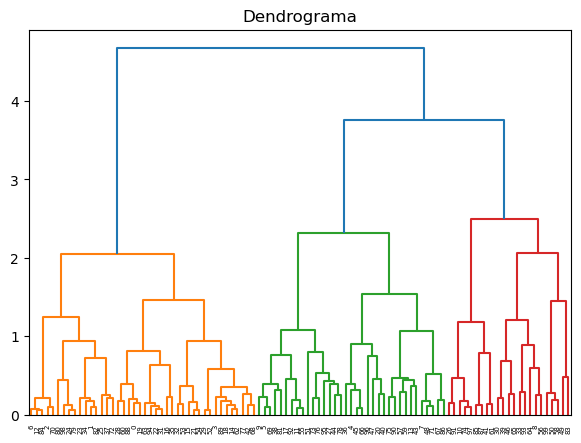

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (7,5))
plt.title('Dendrograma')
dend = shc.dendrogram(shc.linkage(df_2, method = 'ward'))

In [26]:
# imprimimos colores unicos
color_uniq = set(dend['color_list'])
color_uniq

{'C0', 'C1', 'C2', 'C3'}

In [27]:
# obtener el numero de clusters optimos

num_cl_optimo = len(color_uniq) -1
num_cl_optimo

3

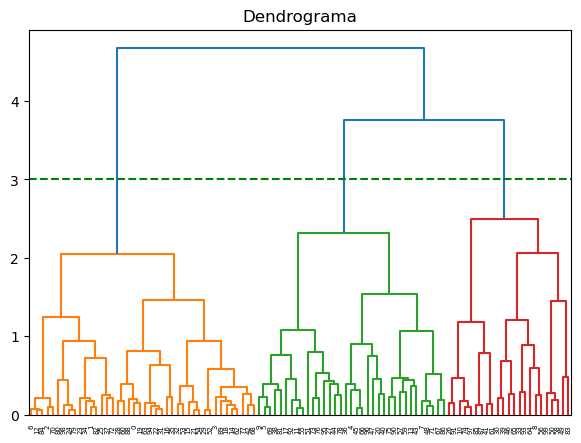

In [29]:
# Graficamos nuevamente colocando una linea que nos indica cuantos cluster debemos de manejar
plt.figure(figsize = (7,5))
plt.title('Dendrograma')
dend = shc.dendrogram(shc.linkage(df_2, method = 'ward'))
plt.axhline(y = 3, color = 'g', linestyle = '--')

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster_agg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward' )
grupos = cluster_agg.fit_predict(df2)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

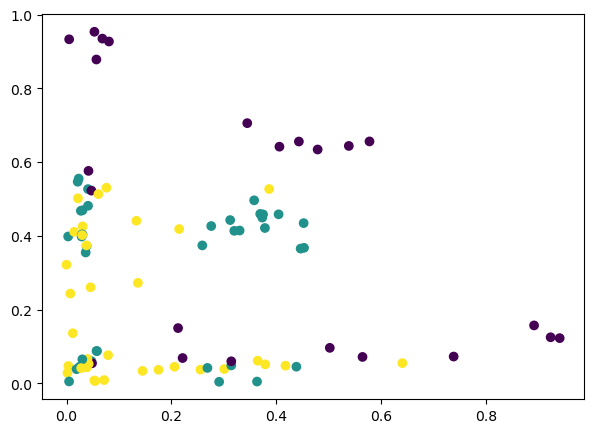

In [32]:
# graficamos
plt.figure(figsize = (7,5))
plt.scatter(df2['Velocidad Entrega'], df2['Calidad Producto'], c = cluster_agg.labels_)
plt.show()

In [33]:
# Separación de grupos mediante de PCA

campos = df2.values
campos

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [36]:
from sklearn import decomposition

# creamos un erreglo de 2 columnas

pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca.transform(campos)

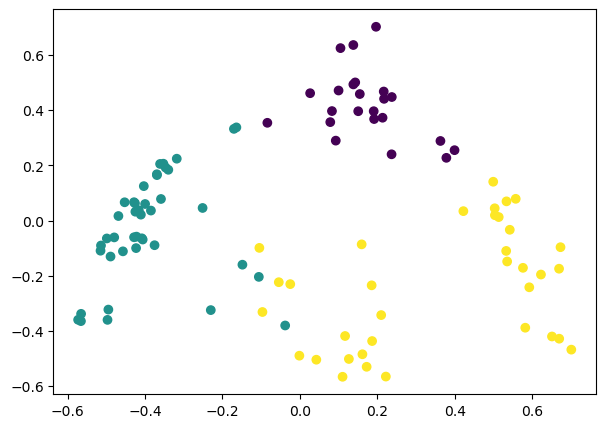

In [37]:
# graficamos
plt.figure(figsize = (7,5))
plt.scatter(campos[:,0], campos[:,1], c = cluster_agg.labels_)

In [38]:
# unimos las dos columnas con el DF, pero como las 2 columnas son un arreglo primero tenemos que convertirlo a DF para unirlos

data = pd.DataFrame(grupos, columns = ['grupo'])
data.head(5)

,grupo
0,1
1,1
2,1
3,1
4,2


In [40]:
# unimos los DF

df3 = pd.concat([df2, data], axis = 1, join = 'inner')
df3

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344,1
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287,1
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102,1
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597,1
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642,2
...,...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311,2
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462,2
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989,0
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310,1


In [45]:
df4 = pd.concat([df['Nombre'], df3], axis = 1)
df4

,Nombre,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344,1
1,Anna,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287,1
2,Bernard,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102,1
3,Edward,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597,1
4,Emilia,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642,2
5,Fabian,0.144940,0.251738,0.602646,0.036616,0.039668,0.028988,0.739957,0.033565,0.004577,2
6,Philip,0.047559,0.024813,0.982187,0.068236,0.072372,0.093049,0.078575,0.059965,0.064101,1
7,Frank,0.133234,0.043045,0.063542,0.522687,0.057393,0.045095,0.707165,0.440697,0.059443,2
8,Xavier,0.738048,0.021470,0.126139,0.630696,0.093933,0.008051,0.101985,0.072463,0.128823,0
9,Gabriel,0.003481,0.304575,0.565640,0.005221,0.064396,0.055694,0.757088,0.046992,0.067877,2


# Con base en los resultados de su análisis.
* ¿qué productos recomendaría a Salomé? ¿Qué productos recomendaría a Stephanía? 
* ¿Qué productos recomendaría a Lydia? La respuesta debe estar reflejada en función de otros clientes. Por ejemplo, “Recomendaría a Salomé los mismos productos que compró XXXXX”. Dé nombres de clientes en cada caso. Expliqué claramente sus conclusiones.

In [52]:
# filtramos por gurpos

gpo_salome = df4[df4['Nombre'] == 'Salome']['grupo'].values[0]
gpo_stephania = df4[df4['Nombre'] == 'Stephania']['grupo'].values[0]
gpo_lydia = df4[df['Nombre'] == 'Lydia']['grupo'].values[0]

print(f'Salome: {gpo_salome}, Stephania: {gpo_stephania}, Lydia: {gpo_lydia}')

Salome: 2, Stephania: 1, Lydia: 1


In [61]:
# filtramos para encontrar otros clientes en los mismos grupos

cli_gpo_salome = df4[df4['grupo'] == gpo_salome]['Nombre'].values
cli_gpo_stephania = df4[df4['grupo'] == gpo_stephania]['Nombre'].values
cli_gpo_lydia = df4[df4['grupo'] == gpo_lydia]['Nombre'].values

In [67]:
# imprimimos los resultados

cli_gpo_salome = [cliente for cliente in cli_gpo_salome if cliente != 'Salome']
cli_gpo_stephania = [cliente for cliente in cli_gpo_stephania if cliente != 'Stephania']
cli_gpo_lydia = [cliente for cliente in cli_gpo_lydia if cliente != 'Lydia']

print('Recomendaría a Salomé los mismos productos que compraron:\n', cli_gpo_salome)
print('Recomendaría a Stephania los mismos productos que compraron:\n', cli_gpo_stephania)
print('Recomendaría a Lydia los mismos productos que compraron:\n', cli_gpo_lydia)

Recomendaría a Salomé los mismos productos que compraron:
 ['Emilia', 'Fabian', 'Frank', 'Gabriel', 'Henry', 'Isabelle', 'Eugenia', 'Evdokia', 'Florence', 'Jeremiah', 'Joachim', 'Santiago', 'Justin', 'Kalyna', 'Larissa', 'Leon', 'Leonard', 'Leo', 'Magdalyna', 'Marcel', 'Maria', 'Maryna', 'Matthew', 'Maya', 'Melania', 'Michael', 'Mina', 'Monica', 'Myron', 'Sebastian', 'Susanna', 'Sylvester', 'Teofan', 'Teofil']
Recomendaría a Stephania los mismos productos que compraron:
 ['Adam', 'Anna', 'Bernard', 'Edward', 'Philip', 'Irene', 'Isidore', 'Joseph', 'Eugene', 'Eunice', 'Eva', 'Fedir', 'Felix', 'Fialka', 'Flavia', 'Flora', 'Hannah', 'Helen', 'Hilary', 'Lourdes', 'Ivan', 'Jacob', 'Jervis', 'Judith', 'Louise', 'Lubomyr', 'Lydia', 'Marian', 'Markian', 'Marko', 'Maura', 'Maximillian', 'Methodius', 'Mykyta', 'Myroslav', 'Myroslava', 'Samuel', 'Sarah', 'Stephan', 'Theodore', 'Teon']
Recomendaría a Lydia los mismos productos que compraron:
 ['Adam', 'Anna', 'Bernard', 'Edward', 'Philip', 'Irene'